# Regularization Demo
## Ridge, Lasso y Elastic Net
### 1. Cargamos librerías

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings 
warnings.filterwarnings('ignore')

### 2. Vemos qué pinta tiene el dataset

In [7]:
boston_dataset = datasets.load_boston()
print(boston_dataset['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### 3. Rápido análisis exploratorio para ver sus dependencias lineales

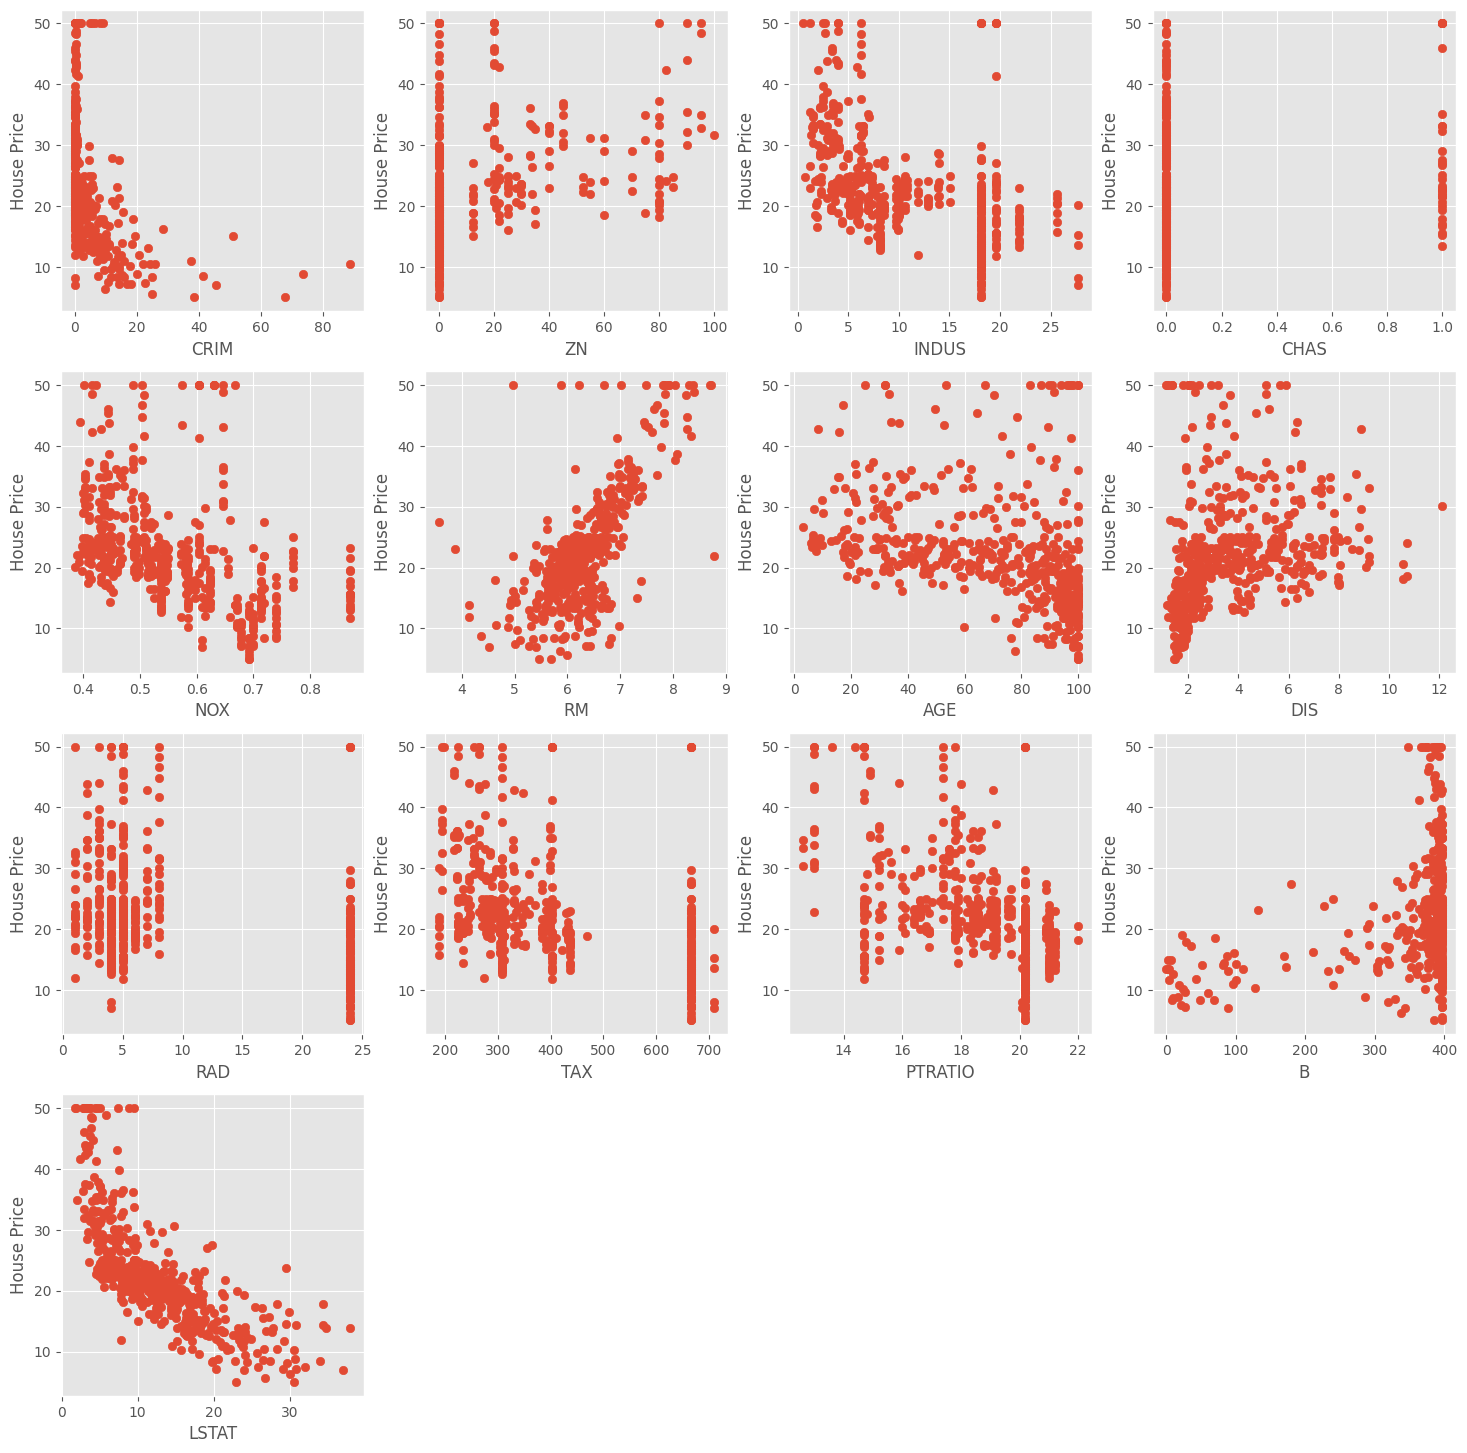

In [10]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(18,18))

for index, feature_name in enumerate(boston_dataset['feature_names']):
    ax = fig.add_subplot(4,4,index+1)
    ax.scatter(boston_dataset['data'][:,index], boston_dataset.target)
    ax.set_xlabel(feature_name,size=12)
    ax.set_ylabel('House Price',size=12)

### 4. Preprocesado de los datos

In [11]:
boston_pd = pd.DataFrame(boston_dataset['data'])
boston_pd.columns = boston_dataset['feature_names']
boston_pd['House_Price'] = boston_dataset['target']
boston_pd

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House_Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [14]:
X = boston_pd.iloc[:,:-1]
y = boston_pd.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)
print(X_train.shape, X_test.shape)

(379, 13) (127, 13)


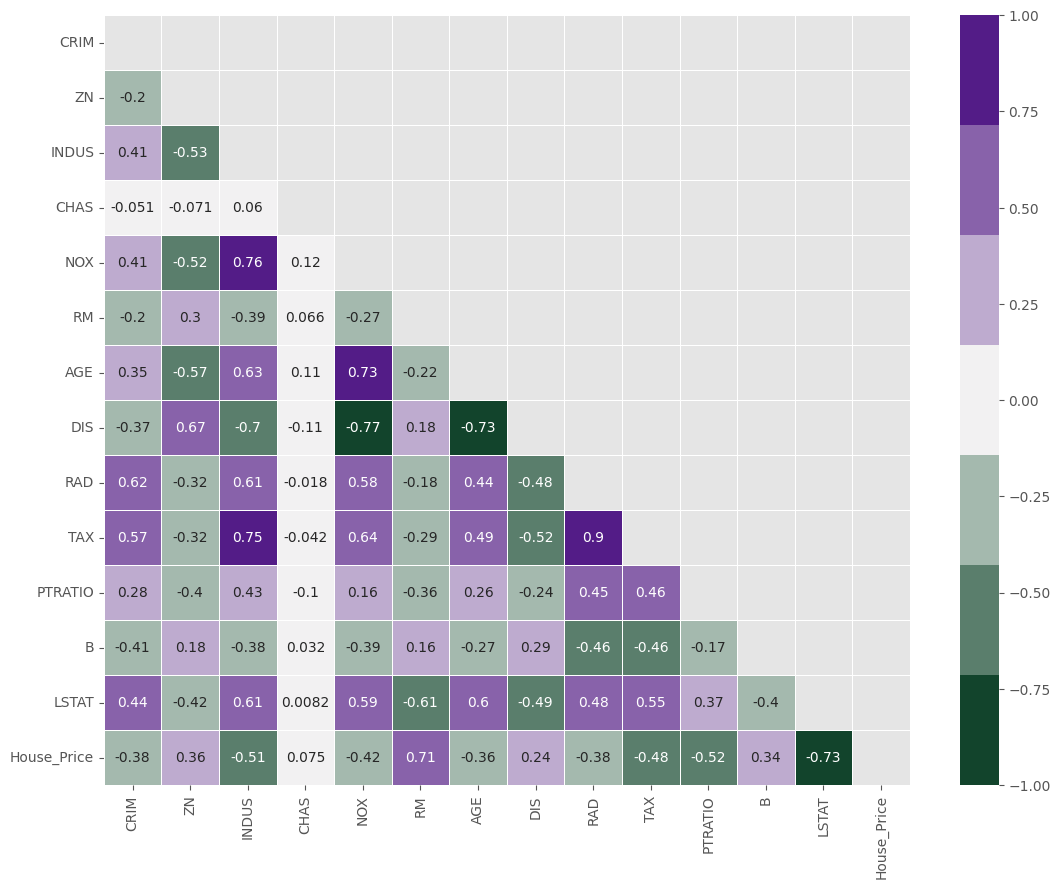

In [22]:
import seaborn as sns
fig,ax = plt.subplots(figsize=(13,10))
sns.heatmap(boston_pd.iloc[X_train.index,:].corr(),
            annot=True,
            linewidths=0.5,
            vmin=-1,vmax=1, mask=np.triu(boston_pd.iloc[X_train.index,:].corr()),
           cmap=sns.diverging_palette(145,280, s=85,l=25,n=7));

### 5. Regresión lineal múltiple

In [23]:
lreg = LinearRegression()
lreg.fit(X_train, y_train)

lreg_y_pred = lreg.predict(X_test)

mean_squared_error = np.mean((lreg_y_pred - y_test)**2)
print('MSE test:', mean_squared_error)

MSE test: 26.522333763452533


In [24]:
lreg_coefficient = pd.DataFrame(lreg.coef_, X_train.columns,
                               columns=['Coefficient'])

lreg_coefficient

,Coefficient
CRIM,-0.107491
ZN,0.041870
INDUS,0.032042
CHAS,0.660837
NOX,-20.811049
RM,3.960800
AGE,0.011850
DIS,-1.495481
RAD,0.295390
TAX,-0.013118


Pintamos los coeficientes para verlos mejor

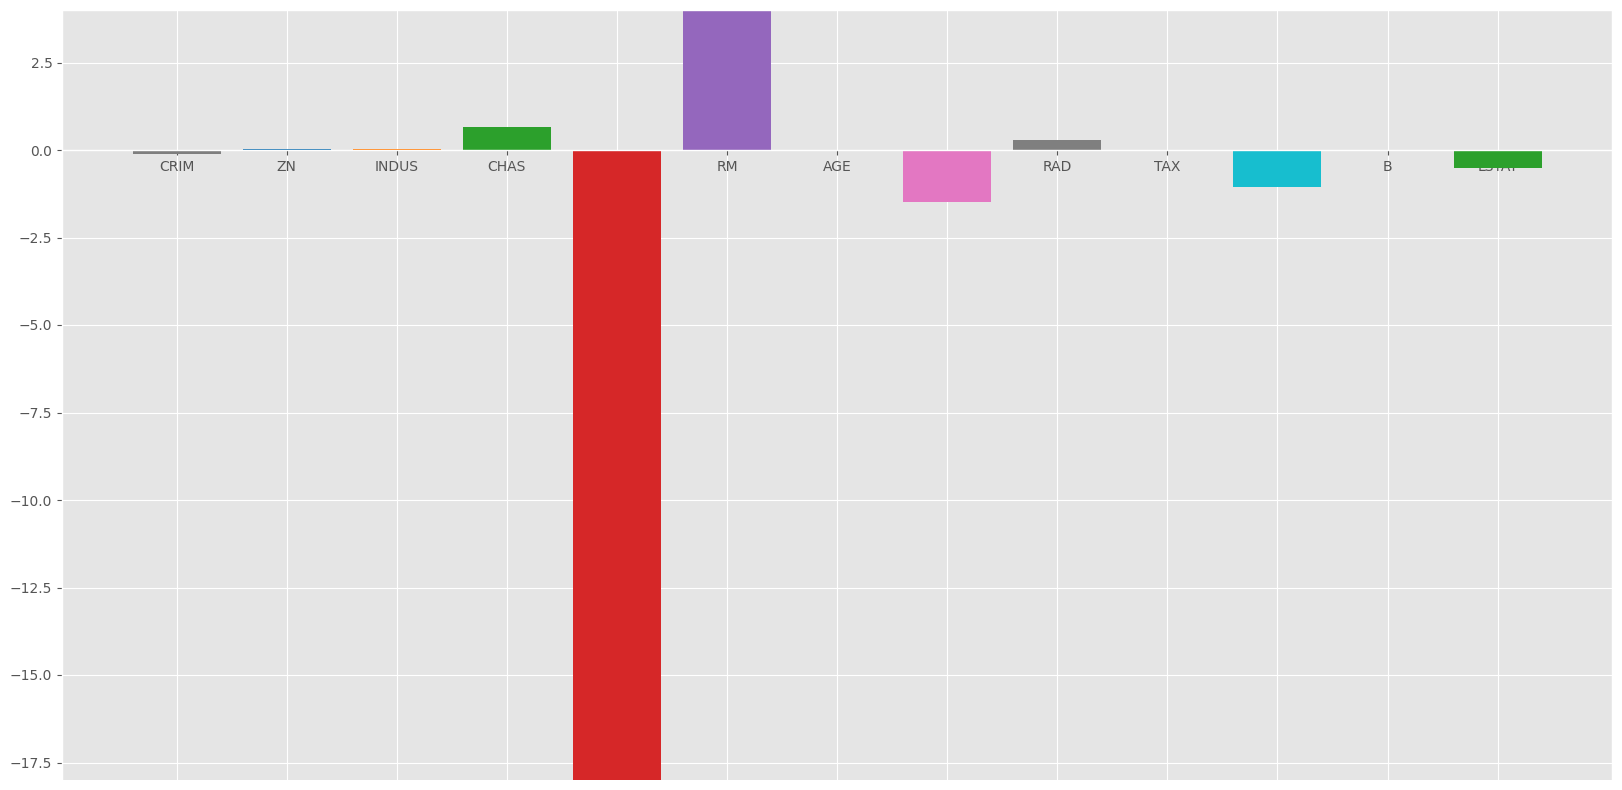

In [25]:
# plotting the coefficient score
fig, ax = plt.subplots(figsize =(20, 10))
color =['tab:gray', 'tab:blue', 'tab:orange',
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']
ax.bar(lreg_coefficient.index,
lreg_coefficient['Coefficient'],
color = color)
ax.spines['bottom'].set_position('zero')
ax.set_ylim([-18,4])
plt.style.use('ggplot');

### 6. Ridge regression

In [26]:
from sklearn.linear_model import Ridge

ridgeR = Ridge(alpha=1)

ridgeR.fit(X_train, y_train)

y_pred_R = ridgeR.predict(X_test)

mean_squared_error_ridge = np.mean((y_pred_R - y_test)**2)
print('MSE test Ridge:', mean_squared_error_ridge)

MSE test Ridge: 26.147386998291523


In [27]:
ridge_coefficient = pd.DataFrame(ridgeR.coef_, X_train.columns,
                               columns=['Coefficient'])

ridge_coefficient

,Coefficient
CRIM,-0.104795
ZN,0.043510
INDUS,-0.016756
CHAS,0.473985
NOX,-10.972095
RM,3.994320
AGE,0.003298
DIS,-1.349789
RAD,0.276616
TAX,-0.013658


Veamos en la gráfica cómo quedaría para alpha = 1

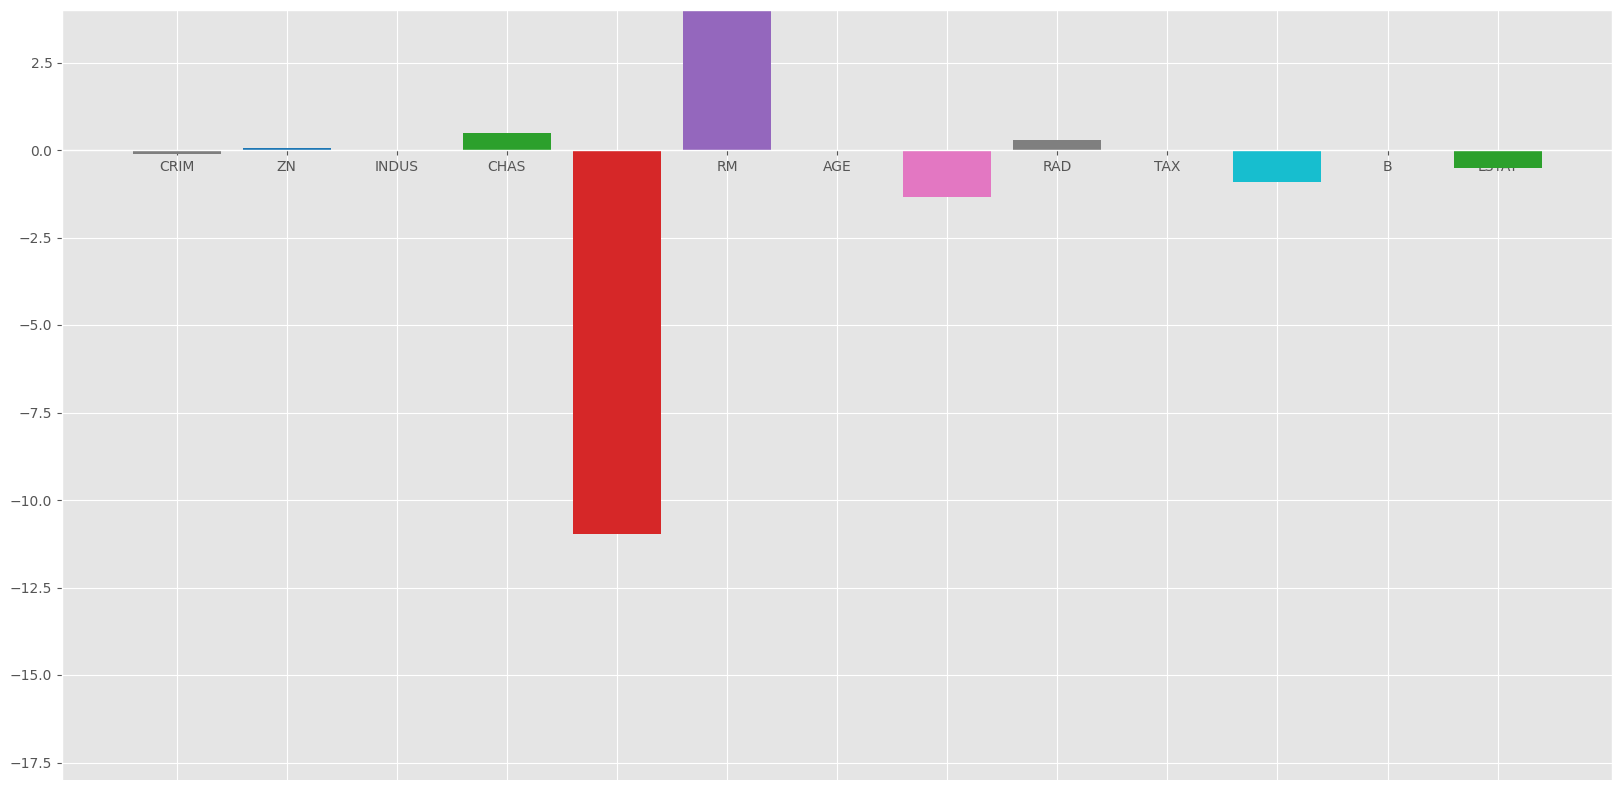

In [28]:
# plotting the coefficient score
fig, ax = plt.subplots(figsize =(20, 10))
color =['tab:gray', 'tab:blue', 'tab:orange',
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']
ax.bar(ridge_coefficient.index,
ridge_coefficient['Coefficient'],
color = color)
ax.spines['bottom'].set_position('zero')
ax.set_ylim([-18,4])
plt.style.use('ggplot');

Si hacemos ahora alpha = 10

MSE test Ridge: 26.436226694353774


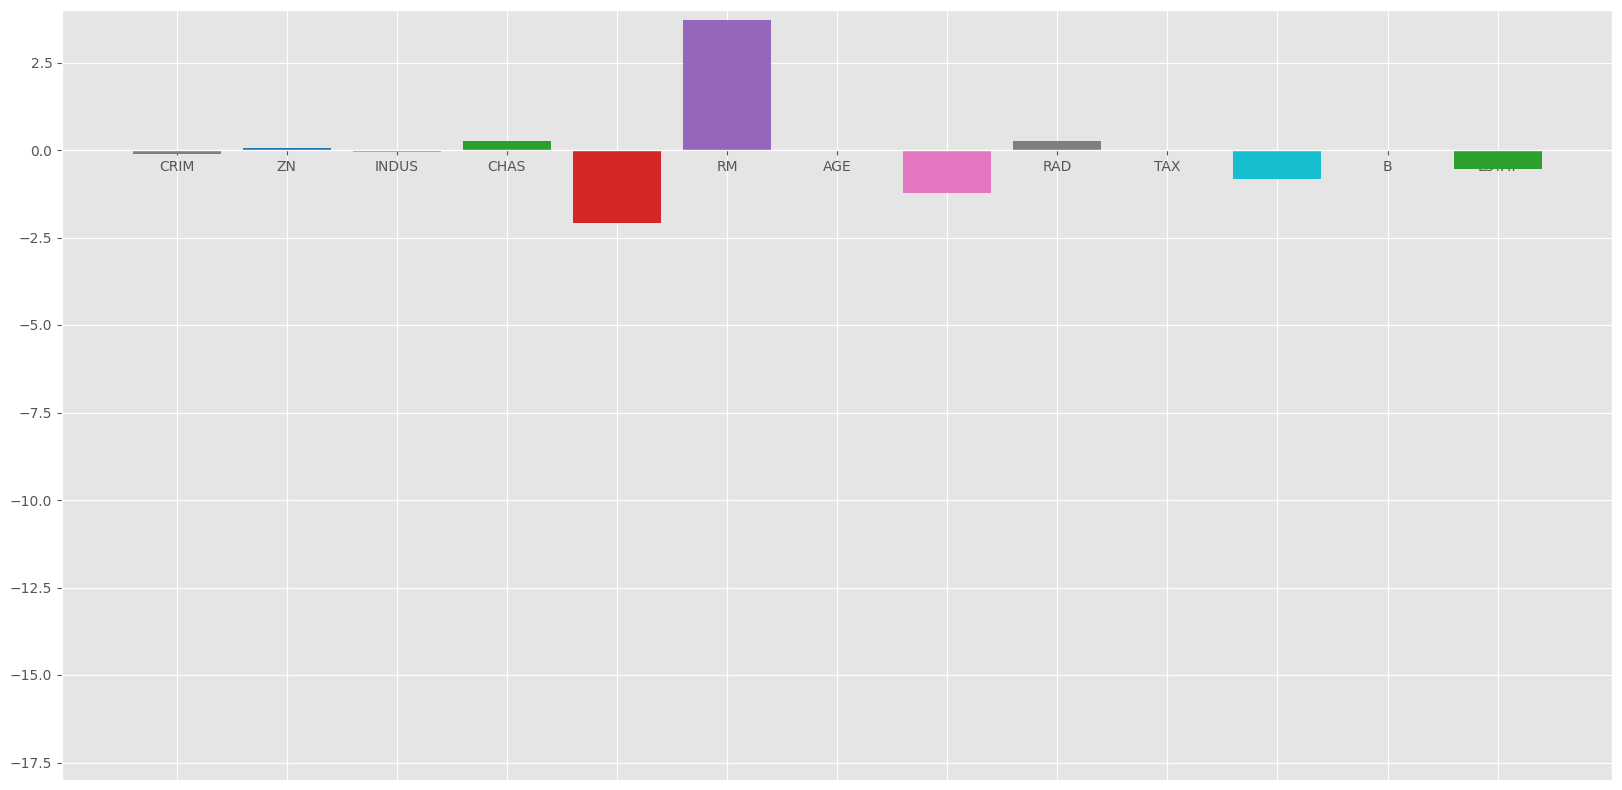

In [29]:
from sklearn.linear_model import Ridge

ridgeR = Ridge(alpha=10)

ridgeR.fit(X_train, y_train)

y_pred_R = ridgeR.predict(X_test)

mean_squared_error_ridge = np.mean((y_pred_R - y_test)**2)
print('MSE test Ridge:', mean_squared_error_ridge)

ridge_coefficient = pd.DataFrame(ridgeR.coef_, X_train.columns,
                               columns=['Coefficient'])

# plotting the coefficient score
fig, ax = plt.subplots(figsize =(20, 10))
color =['tab:gray', 'tab:blue', 'tab:orange',
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']
ax.bar(ridge_coefficient.index,
ridge_coefficient['Coefficient'],
color = color)
ax.spines['bottom'].set_position('zero')
ax.set_ylim([-18,4])
plt.style.use('ggplot');

### 7. Lasso regression

In [30]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1)

lasso.fit(X_train, y_train)

y_pred1 = lasso.predict(X_test)

mean_squared_error_lasso = np.mean((y_pred1 - y_test)**2)
print('MSE Lasso test:', mean_squared_error_lasso)



MSE Lasso test: 29.987238573110194


,Coefficient
CRIM,-0.063105
ZN,0.045144
INDUS,-0.016455
CHAS,0.000000
NOX,-0.000000
RM,0.972476
AGE,0.025881
DIS,-0.661936
RAD,0.255765
TAX,-0.015594


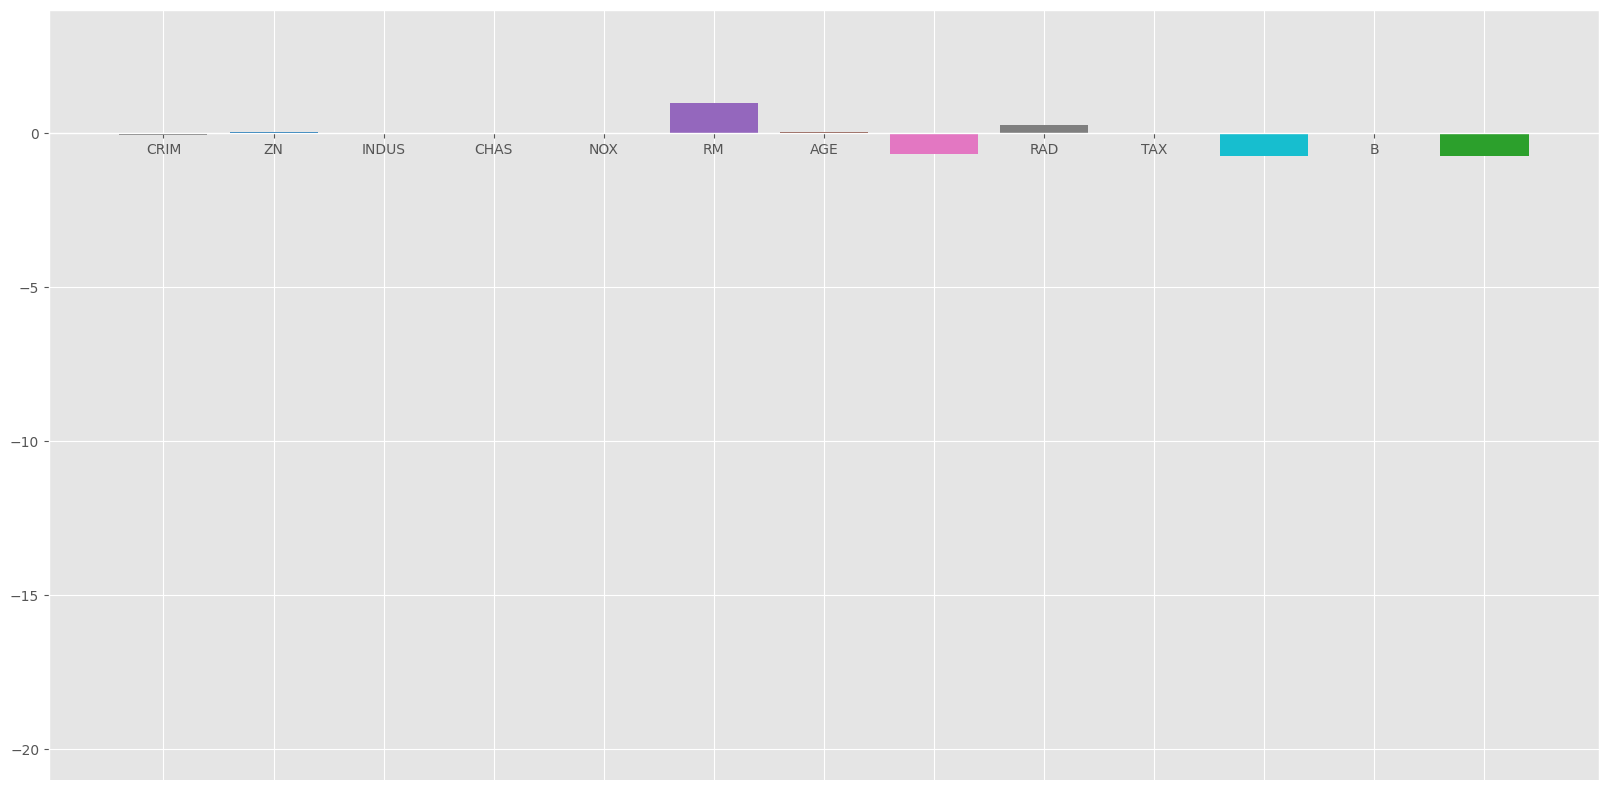

In [31]:
laso_coefficient = pd.DataFrame(lasso.coef_, X_train.columns,
                      columns=['Coefficient'])

# plotting the coefficient score
fig, ax = plt.subplots(figsize =(20, 10))
color =['tab:gray', 'tab:blue', 'tab:orange',
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']
ax.bar(laso_coefficient.index,
laso_coefficient['Coefficient'],
color = color)
ax.spines['bottom'].set_position('zero')
ax.set_ylim([-21,4])
plt.style.use('ggplot');
laso_coefficient

MSE Lasso test: 43.7654197571739


,Coefficient
CRIM,-0.000000
ZN,0.023174
INDUS,-0.000000
CHAS,0.000000
NOX,0.000000
RM,0.000000
AGE,0.000000
DIS,-0.000000
RAD,0.000000
TAX,-0.010878


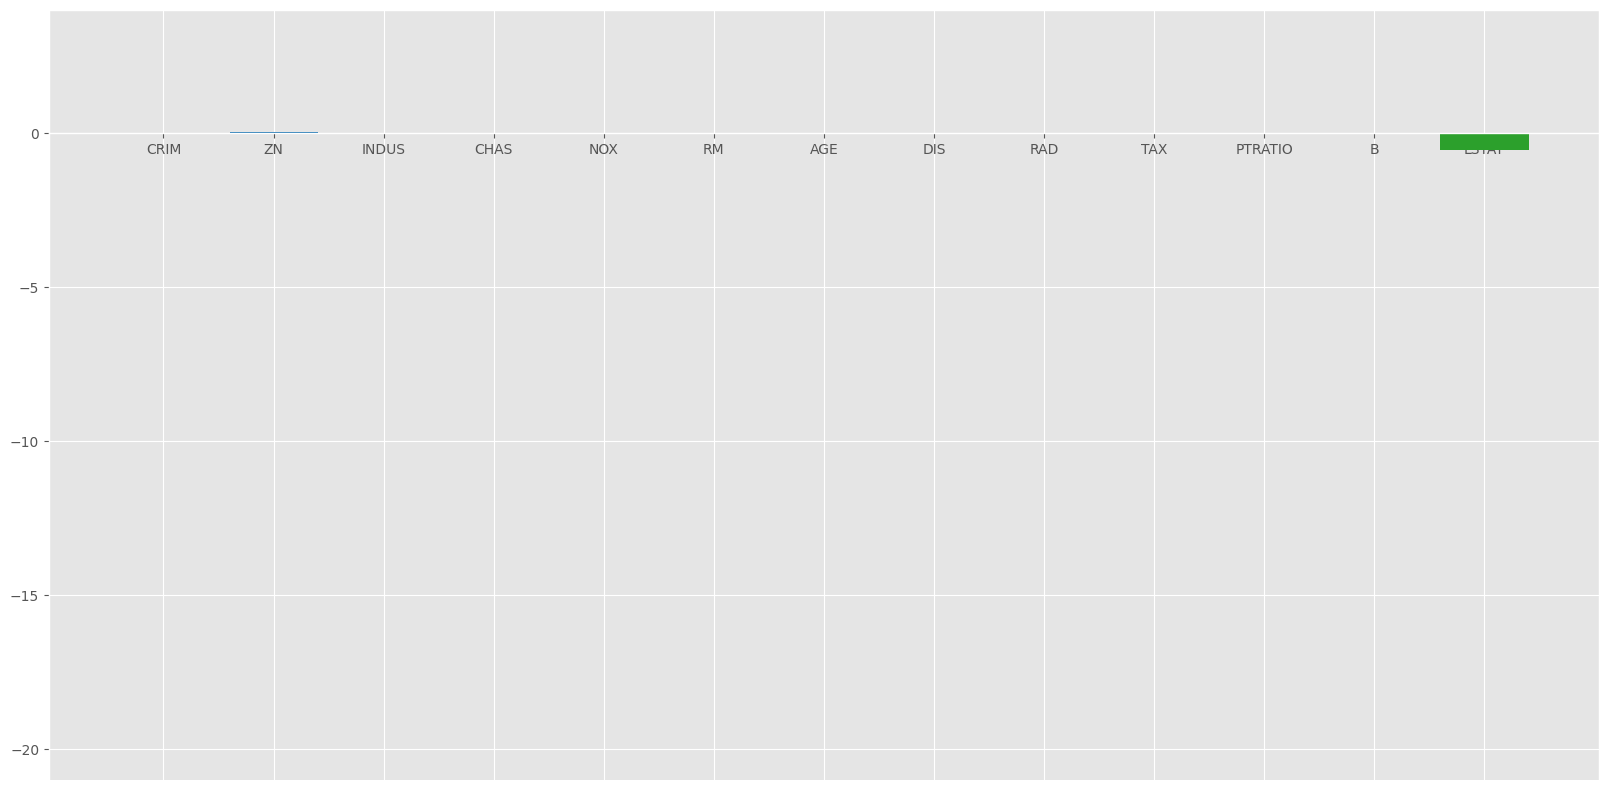

In [32]:
lasso = Lasso(alpha=10)

lasso.fit(X_train, y_train)

y_pred1 = lasso.predict(X_test)

mean_squared_error_lasso = np.mean((y_pred1 - y_test)**2)
print('MSE Lasso test:', mean_squared_error_lasso)

laso_coefficient = pd.DataFrame(lasso.coef_, X_train.columns,
                      columns=['Coefficient'])

# plotting the coefficient score
fig, ax = plt.subplots(figsize =(20, 10))
color =['tab:gray', 'tab:blue', 'tab:orange',
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']
ax.bar(laso_coefficient.index,
laso_coefficient['Coefficient'],
color = color)
ax.spines['bottom'].set_position('zero')
ax.set_ylim([-21,4])
plt.style.use('ggplot');
laso_coefficient

### 8. Elastic Net

MSE Elastic Net test: 29.954603564039598


,Coefficient
CRIM,-0.066780
ZN,0.046135
INDUS,-0.025107
CHAS,0.000000
NOX,-0.000000
RM,0.952354
AGE,0.025882
DIS,-0.691975
RAD,0.261945
TAX,-0.015672


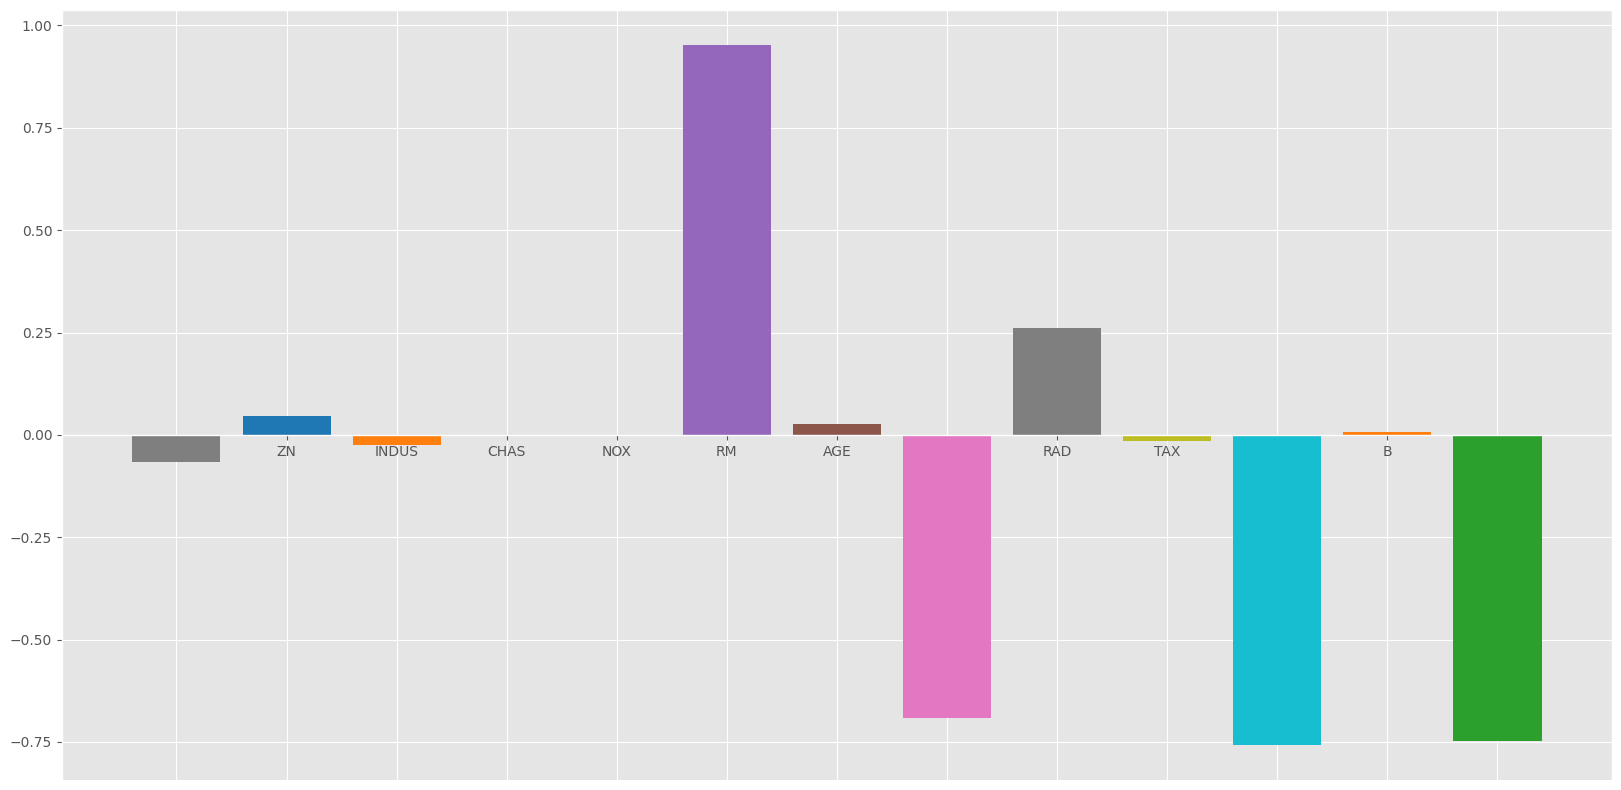

In [36]:
from sklearn.linear_model import ElasticNet

e_net = ElasticNet(alpha=1, l1_ratio = 0.9)
e_net.fit(X_train, y_train)
y_pred_elastic = e_net.predict(X_test)
mean_squared_error = np.mean((y_pred_elastic - y_test)**2)
print('MSE Elastic Net test:',mean_squared_error)
enet_coefficient = pd.DataFrame(e_net.coef_, X_train.columns,
                      columns=['Coefficient'])
# plotting the coefficient score
fig, ax = plt.subplots(figsize =(20, 10))
color =['tab:gray', 'tab:blue', 'tab:orange',
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']
ax.bar(enet_coefficient.index,
enet_coefficient['Coefficient'],
color = color)
ax.spines['bottom'].set_position('zero')
plt.style.use('ggplot');
enet_coefficient

Conclusion :
From the above analysis we can reach the following conclusion about different regularization methods:

Regularization is used to reduce the dependence on any particular independent variable by adding the penalty term to the Loss function. This term prevents the coefficients of the independent variables to take extreme values.
Ridge Regression adds L2 regularization penalty term to loss function. This term reduces the coefficients but does not make them 0 and thus doesn’t eliminate any independent variable completely. It can be used to measure the impact of the different independent variables.
Lasso Regression adds L1 regularization penalty term to loss function. This term reduces the coefficients as well as makes them 0 thus effectively eliminate the corresponding independent variable completely. It can be used for feature selection etc.
Elastic Net is a combination of both of the above regularization. It contains both the L1 and L2 as its penalty term. It performs better than Ridge and Lasso Regression for most of the test cases.
